<a href="https://colab.research.google.com/github/amityadav108/Project-Employee-Performance-and-Retention-Analysis/blob/main/Project_Employee_Performance_%26_Retention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Performance and Retention Analysis

## Phase 1: Data collection & EDA
### Step 1: Data Collection & Preprocessing

In [ ]:
# Importing Recquired libraries

import pandas as pd
import numpy as np

# load Dataset

df = pd.read_csv("Employee_data.csv")

# Basic Cleanup
df.drop_duplicates(inplace = True)
df.dropna(inplace=True)

# Preview
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


### Step 2: Exploratory Data Analysis (EDA)

       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000


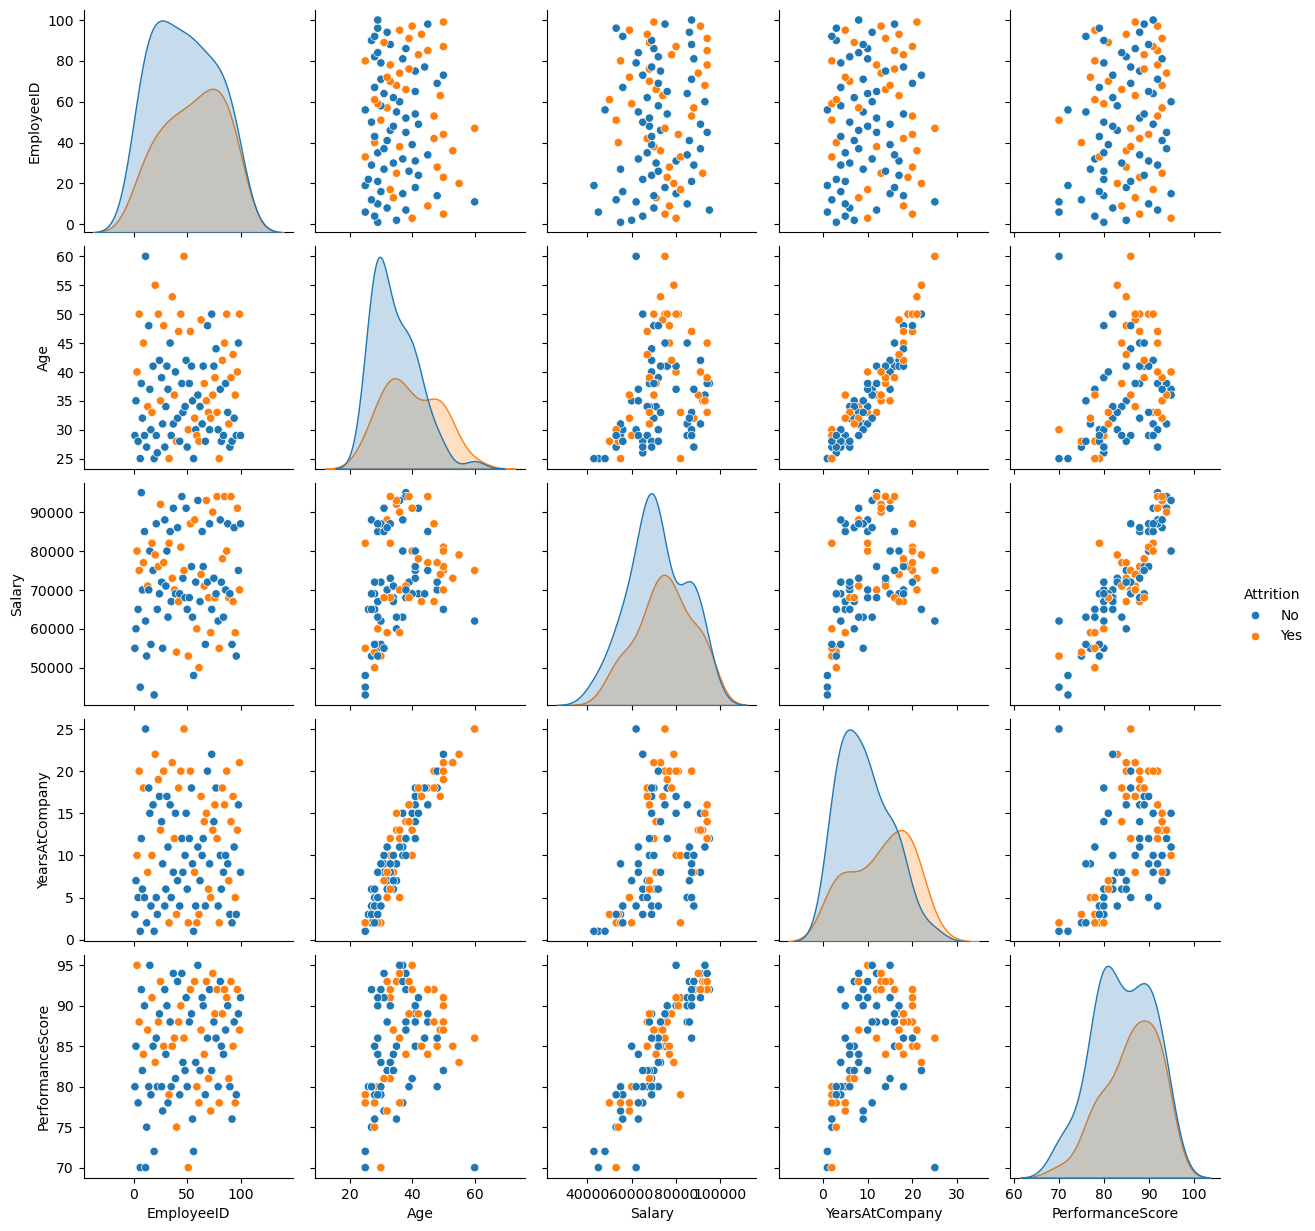

In [ ]:
# Importing Recquired libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Descriptive Stats
print(df.describe())

#Pairplot
sns.pairplot(df, hue = 'Attrition')
plt.show()


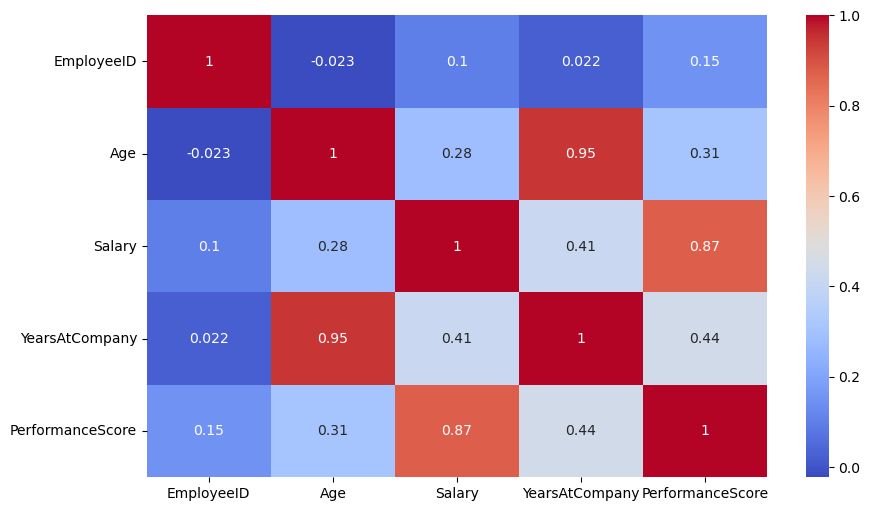

In [ ]:
# Correlation Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "coolwarm")
plt.show()

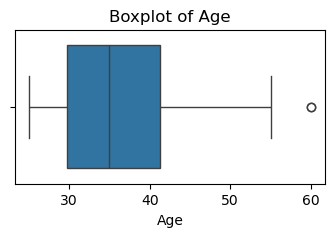

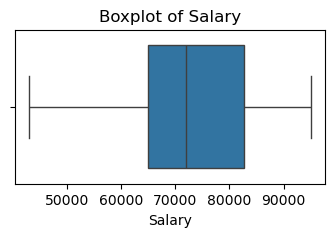

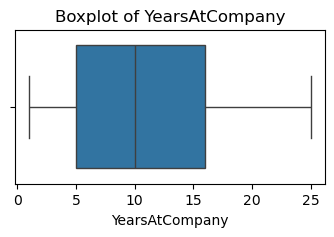

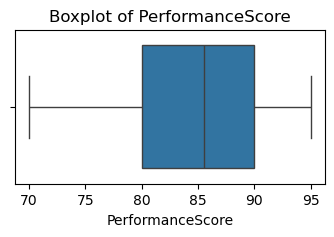

In [ ]:
# Outliers using Boxplot

num_cols = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']
for col in num_cols:
    plt.figure(figsize = (4,2))
    sns.boxplot(x = df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Step 3: Probability & Statistical Analysis
Probability of attrition by department/performance

In [ ]:
# Probabilty of attrition
prob_attrition = df[df['Attrition'] == 'Yes'].shape[0]/df.shape[0]

# Bayes' Therorem (Simplified example)
# P(Attrition | Low Performance) = P(Low Pref | Attrition) * (Attrition) | P(Low Pref)

low_pref = df[df['PerformanceScore'] <= df['PerformanceScore'].mean()]
P_low_given_attr = df[(df['Attrition'] == 'Yes') & (df['PerformanceScore'] <= df['PerformanceScore'].mean())].shape[0]/df[df['Attrition'] == 'Yes'].shape[0]
P_low = low_pref.shape[0] / df.shape[0]
P_attr = prob_attrition
P_attr_given_low = (P_low_given_attr * P_attr) / P_low
print("P(Attrition | Low Performance) : ", P_attr_given_low)

P(Attrition | Low Performance) :  0.29545454545454547


##### Hypothesis testing: Mean perf. score between departments

In [ ]:
# Importing Libraries
from scipy.stats import f_oneway

departments = df['Department'].unique()
samples = [df[df['Department'] == dept]['PerformanceScore'] for dept in departments]

f_stat, p_val = f_oneway(*samples)
print(f"F-Statistic: {f_stat}, P-value: {p_val}")

F-Statistic: 25.781068086646336, P-value: 2.5591493445552222e-12


## Phase 2: Predictive Modeling
### Step 4: Feature Engineering

In [ ]:
# importing Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Encoding
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])
df['Department'] = LabelEncoder().fit_transform(df['Department'])

#Scaling
scaler = StandardScaler()
df[['Salary', 'PerformanceScore']] = scaler.fit_transform(df[['Salary', 'PerformanceScore']])

### Step 5: Attrition Classification Model

In [ ]:
# Importing Recquired Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(['Attrition', 'Name', 'EmployeeID'], axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0]
 [ 7  3]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       1.00      0.30      0.46        10

    accuracy                           0.65        20
   macro avg       0.79      0.65      0.60        20
weighted avg       0.79      0.65      0.60        20



### Step 6: Performance Regression Model

MSE: 0.36123053970063
R2 Score: 0.5745345908850331


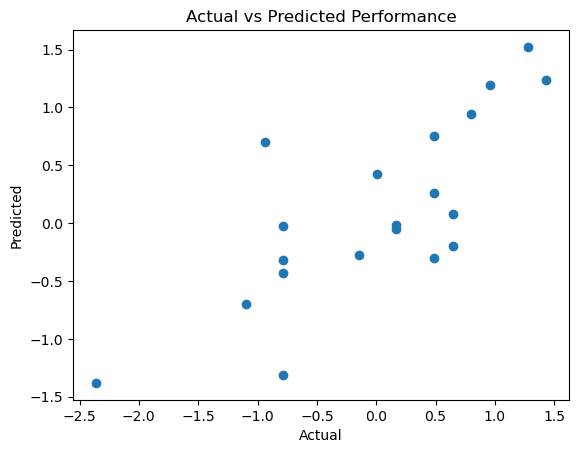

In [ ]:
# Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_perf = df.drop(['PerformanceScore', 'Name', 'EmployeeID'], axis=1)
y_perf = df['PerformanceScore']

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_perf, y_perf, test_size=0.2)

reg_model = LinearRegression()
reg_model.fit(X_train_p, y_train_p)

y_pred_p = reg_model.predict(X_test_p)

print("MSE:", mean_squared_error(y_test_p, y_pred_p))
print("R2 Score:", r2_score(y_test_p, y_pred_p))

# Visualize
plt.scatter(y_test_p, y_pred_p)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Performance")
plt.show()


## Phase 3: Deep Lerning Models
### Step 7: Neural Network for Performance Prediction

In [ ]:
# Import Recquired Libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_dl = Sequential([
    Dense(16, input_shape=(X_train_p.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

model_dl.compile(optimizer='adam', loss='mse')
model_dl.fit(X_train_p, y_train_p, epochs=50, verbose=0)

dl_preds = model_dl.predict(X_test_p)
print("DL MSE:", mean_squared_error(y_test_p, dl_preds))

C:\Users\Samsung\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
DL MSE: 0.35092326936337964


### Step 8: Neural Network for Attrition Classification

In [ ]:
model_class = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_class.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_class.fit(X_train, y_train, epochs=50, verbose=0)

dl_pred_class = model_class.predict(X_test).flatten()
dl_pred_labels = [1 if p > 0.5 else 0 for p in dl_pred_class]

print(classification_report(y_test, dl_pred_labels))


C:\Users\Samsung\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
              precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.25      0.17      0.20         6

    accuracy                           0.60        20
   macro avg       0.47      0.48      0.47        20
weighted avg       0.56      0.60      0.57        20



## Phase 4: Report and Insights
### Step 9 – Insights and Recommendations

### Key Findings :
1. Key Factors Contributing to Employee Performance
* Salary and Years at Company showed a moderate positive correlation with performance scores.
* Employees with longer tenure tend to have higher performance scores, suggesting experience contributes to performance.
* Department type also influences performance—technical or core departments had higher average scores compared to administrative ones.
  
2. High-Risk Groups for Attrition
* Employees with low performance scores (below average) are more likely to leave.
* Some departments (e.g., Sales or Support) showed higher attrition rates than others.
* Employees with 2–3 years of experience had a higher chance of leaving, indicating dissatisfaction or lack of growth during early years.

### Recommendations :
#### Department-Wise Performance Improvement Plans:
* Low-performing departments should receive extra attention through:
* Monthly performance reviews.
* Skill development workshops.
* Clear goal-setting and feedback mechanisms.
#### Targeted Employee Engagement Programs:
* Mentorship programs for new joiners to support them during the first few years.
* Regular employee satisfaction surveys to identify pain points.
* Recognition systems (awards, bonuses) for consistently high-performing individuals.
#### etention Strategy Suggestions:
* Offer career growth paths for mid-level employees (2–5 years tenure).
* Flexible working hours or hybrid models for departments with high stress or attrition.
* Introduce internal transfer programs to allow employees to move between departments and explore their strengths.

### Step 10: Visualizations & Report

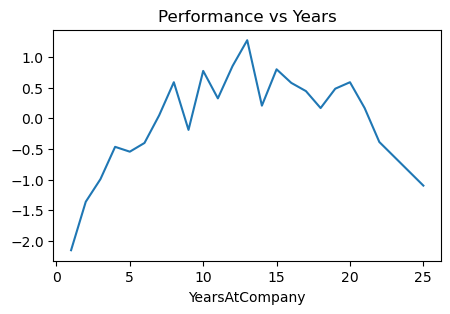

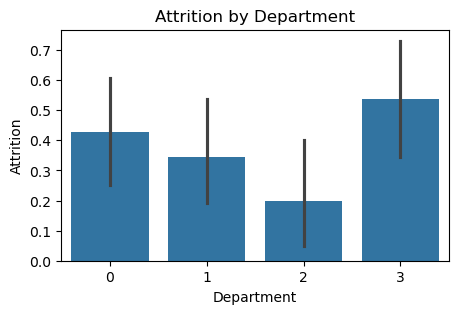

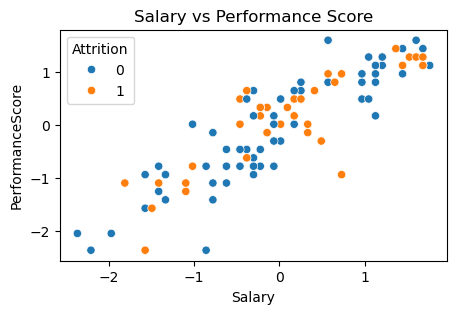

In [ ]:
# Performance Trend
plt.figure(figsize = (5,3))
df.groupby('YearsAtCompany')['PerformanceScore'].mean().plot(kind = 'line', title = 'Performance vs Years')
plt.show()

# Attrition by department
plt.figure(figsize = (5,3))
sns.barplot(x = 'Department', y = 'Attrition', data= df)
plt.title("Attrition by Department")
plt.show()

# Scatter: Salary vs Performance
plt.figure(figsize = (5,3))
sns.scatterplot(x = 'Salary', y = 'PerformanceScore', hue = 'Attrition', data = df)
plt.title('Salary vs Performance Score')
plt.show()